# レッスン3: フィルターと音色デザイン

前回まで学んだこと：
- 基本的な波形（サイン波、三角波、のこぎり波、矩形波）
- エンベロープ（ADSR）による音の変化

今回のレッスンで学ぶこと：
- **フィルター**による音色の変化
- **ローパスフィルター**とカットオフ周波数
- **実用的な楽器音の作成**
- **複数の波形の合成**による豊かな音色作り

🎵 ゴール：シンプルなピアノ風、オルガン風の音を作れるようになる

## 準備：ライブラリのセットアップ

In [1]:
# 🛠️ 環境セットアップ

# 共通ライブラリのインポート
import sys
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import warnings
warnings.filterwarnings('ignore')

# Google Colab環境かどうかを判定
try:
    import google.colab
    IN_COLAB = True
    print("🔧 Google Colab環境で実行中...")
except ImportError:
    IN_COLAB = False
    print("🏠 ローカル環境で実行中")

# ライブラリのセットアップ
if IN_COLAB:
    print("🔧 Google Colab環境を設定中...")
    
    # 必要なパッケージをインストール
    !pip install japanize-matplotlib
    
    # GitHubからライブラリをクローン
    !git clone https://github.com/ggszk/simple-audio-programming.git
    
    # パスを追加
    sys.path.append('/content/simple-audio-programming')

    # ライブラリ設定
    import japanize_matplotlib
    
else:
    print("🔧 ローカル環境を設定中...")

    # パスを追加
    sys.path.append('..')
    # poetryでのパッケージインストールは今後の課題

    # 日本語フォント設定（Mac）
    plt.rcParams['font.family'] = 'Meiryo'

print("\n🎵 Simple Audio Programming へようこそ！")
print("✅ セットアップ完了")

🏠 ローカル環境で実行中
🔧 ローカル環境を設定中...

🎵 Simple Audio Programming へようこそ！
✅ セットアップ完了


## 3.1 フィルターとは何か？

フィルターは音の特定の周波数成分を削る（または強調する）効果です。

- **ローパスフィルター**：高い周波数をカット（低音は通す）
- **ハイパスフィルター**：低い周波数をカット（高音は通す）
- **バンドパスフィルター**：特定の周波数帯域のみ通す

今回は最も基本的な**ローパスフィルター**を学びます。

In [7]:
# フィルターなしとありの音を比較してみよう
duration = 1.0
frequency = 220  # A3

# 共通設定
from audio_lib.core import AudioConfig
config = AudioConfig(sample_rate=44100)

# のこぎり波（倍音が豊富）を作成
from audio_lib import SawtoothWave, LowPassFilter
sawtooth = SawtoothWave(config)
samples = sawtooth.generate(frequency, duration)

print("🔊 元の音（フィルターなし - のこぎり波）")
display(Audio(samples, rate=config.sample_rate))

# ローパスフィルターを適用
lowpass = LowPassFilter(cutoff_freq=800)  # 800Hz以上をカット
filtered_samples = lowpass.process(samples)

print("\n🔊 フィルター適用後（800Hz ローパス）")
display(Audio(filtered_samples, rate=config.sample_rate))

print("\n💡 フィルターによって高い周波数成分がカットされ、")
print("まろやかで温かい音になりました！")

🔊 元の音（フィルターなし - のこぎり波）



🔊 フィルター適用後（800Hz ローパス）



💡 フィルターによって高い周波数成分がカットされ、
まろやかで温かい音になりました！


### 🎧 聞き比べてみよう
- フィルターなし：シャープで明るい音
- フィルターあり：柔らかくて暖かい音

これがフィルターの基本的な効果です！

## 3.2 カットオフ周波数の効果

In [8]:
# 異なるカットオフ周波数を試してみよう
cutoff_frequencies = [200, 500, 1000, 2000, 4000]

# 元の音（のこぎり波）
sawtooth = SawtoothWave(config)
original_samples = sawtooth.generate(220, 1.0)

print("カットオフ周波数による音色の変化：")
print("\n元の音（フィルターなし）:")
display(Audio(original_samples, rate=config.sample_rate))

for cutoff in cutoff_frequencies:
    filter_lp = LowPassFilter(cutoff_freq=cutoff)
    filtered = filter_lp.process(original_samples)
    
    print(f"\nカットオフ {cutoff}Hz:")
    display(Audio(filtered, rate=config.sample_rate))

カットオフ周波数による音色の変化：

元の音（フィルターなし）:



カットオフ 200Hz:



カットオフ 500Hz:



カットオフ 1000Hz:



カットオフ 2000Hz:



カットオフ 4000Hz:


### 📊 スペクトラム分析：フィルターの効果を視覚化

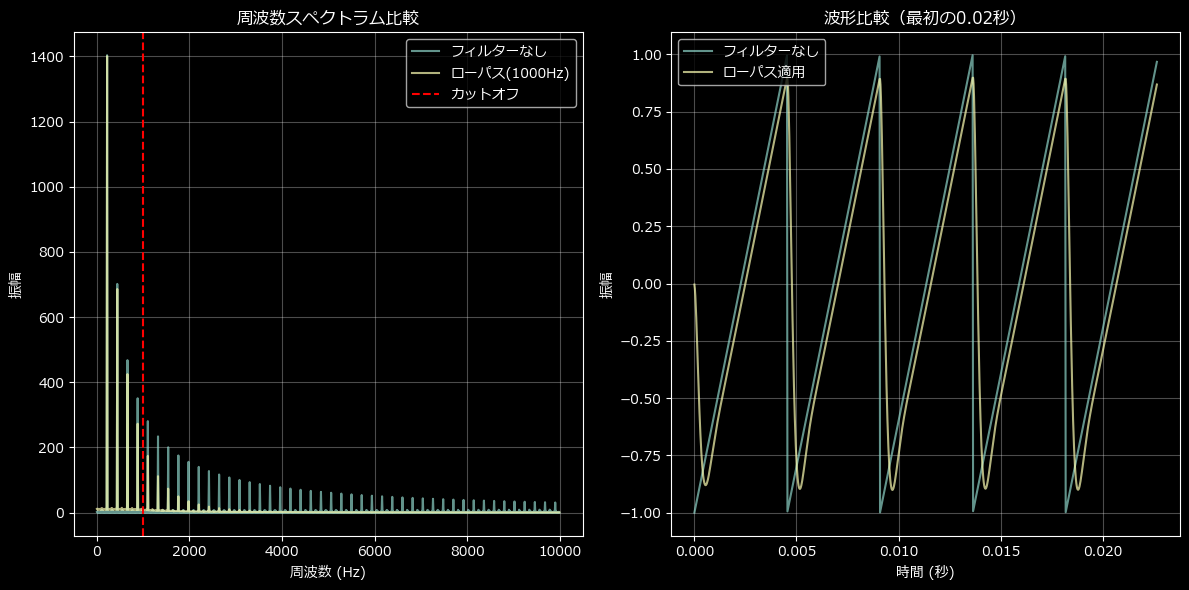

In [9]:
# フーリエ変換でスペクトラムを見てみよう
from scipy.fft import fft, fftfreq

# 短いサンプルで分析
short_duration = 0.1
sawtooth = SawtoothWave(config)
samples = sawtooth.generate(220, short_duration)

# フィルター適用
filter_lp = LowPassFilter(cutoff_freq=1000)
filtered_samples = filter_lp.process(samples)

# FFT計算
n = len(samples)
freqs = fftfreq(n, 1/config.sample_rate)[:n//2]
original_fft = np.abs(fft(samples))[:n//2]
filtered_fft = np.abs(fft(filtered_samples))[:n//2]

# グラフ表示
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(freqs[:1000], original_fft[:1000], label='フィルターなし', alpha=0.7)
plt.plot(freqs[:1000], filtered_fft[:1000], label='ローパス(1000Hz)', alpha=0.7)
plt.axvline(x=1000, color='red', linestyle='--', label='カットオフ')
plt.xlabel('周波数 (Hz)')
plt.ylabel('振幅')
plt.title('周波数スペクトラム比較')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
time = np.linspace(0, short_duration, len(samples))
plt.plot(time[:1000], samples[:1000], label='フィルターなし', alpha=0.7)
plt.plot(time[:1000], filtered_samples[:1000], label='ローパス適用', alpha=0.7)
plt.xlabel('時間 (秒)')
plt.ylabel('振幅')
plt.title('波形比較（最初の0.02秒）')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.3 楽器音の作成：シンプルなピアノ風の音

In [11]:
from audio_lib.synthesis import note_to_frequency, note_name_to_number

def create_piano_sound(note_freq, duration=2.0):
    """シンプルなピアノ風の音を作成"""
    
    # 基音と倍音を組み合わせ（簡単なフォルマント合成）
    fundamental = SineWave(config)
    harmonic2 = SineWave(config)
    harmonic3 = SineWave(config)
    harmonic4 = SineWave(config)
    
    # 各倍音のサンプル生成（周波数と振幅を調整）
    samples1 = fundamental.generate(note_freq, duration)
    samples2 = harmonic2.generate(note_freq * 2, duration) * 0.3
    samples3 = harmonic3.generate(note_freq * 3, duration) * 0.2
    samples4 = harmonic4.generate(note_freq * 4, duration) * 0.1
    
    # 合成
    mixed_samples = samples1 + samples2 + samples3 + samples4
    
    # ピアノ風のエンベロープ（速いアタック、ゆっくりリリース）
    envelope = ADSREnvelope(
        attack=0.01,   # 速いアタック
        decay=0.3,     # 中程度のディケイ
        sustain=0.4,   # 低めのサスティン
        release=1.5    # 長いリリース
    )
    
    # エンベロープを生成してから適用
    envelope_array = envelope.generate(duration)
    final_samples = apply_envelope(mixed_samples, envelope_array)
    
    # ローパスフィルターで自然な響きに
    filter_lp = LowPassFilter(cutoff_freq=3000)
    final_samples = filter_lp.process(final_samples)
    
    return final_samples

# ピアノ風の音を試してみよう
piano_c = create_piano_sound(note_to_frequency(note_name_to_number('C4')))
piano_e = create_piano_sound(note_to_frequency(note_name_to_number('E4')))
piano_g = create_piano_sound(note_to_frequency(note_name_to_number('G4')))

print("ピアノ風の音：")
print("C4:")
display(Audio(piano_c, rate=config.sample_rate))
print("E4:")
display(Audio(piano_e, rate=config.sample_rate))
print("G4:")
display(Audio(piano_g, rate=config.sample_rate))

NameError: name 'SineWave' is not defined

## 3.4 オルガン風の音を作ってみよう

In [ ]:
def create_organ_sound(note_freq, duration=3.0):
    """シンプルなオルガン風の音を作成"""
    
    # オルガンは正弦波の倍音構造
    fundamental = SineWave(config)
    octave = SineWave(config)
    fifth = SineWave(config)
    
    # サンプル生成（周波数と振幅を調整）
    samples1 = fundamental.generate(note_freq, duration) * 0.6
    samples2 = octave.generate(note_freq * 2, duration) * 0.4  # オクターブ
    samples3 = fifth.generate(note_freq * 3, duration) * 0.3   # 5度
    
    # 合成
    mixed_samples = samples1 + samples2 + samples3
    
    # オルガン風のエンベロープ（スローアタック、サスティン重視）
    envelope = ADSREnvelope(
        attack=0.5,    # ゆっくりアタック
        decay=0.2,     # 短いディケイ
        sustain=0.8,   # 高いサスティン
        release=1.0    # 中程度のリリース
    )
    
    # エンベロープを生成してから適用
    envelope_array = envelope.generate(duration)
    final_samples = apply_envelope(mixed_samples, envelope_array)
    
    # 少し高めのカットオフでクリアな音色に
    filter_lp = LowPassFilter(cutoff_freq=4000)
    final_samples = filter_lp.process(final_samples)
    
    return final_samples

# オルガン風の音を試してみよう
organ_c = create_organ_sound(note_to_frequency(note_name_to_number('C4')))

print("オルガン風の音（C4）:")
display(Audio(organ_c, rate=config.sample_rate))

## 3.5 実践演習：自分だけの楽器音を作ろう

In [ ]:
# 課題：以下のパラメータを調整して、自分だけの楽器音を作ってみよう

def create_custom_instrument(note_freq, duration=2.0):
    """カスタム楽器音の作成 - パラメータを変更して実験してみよう！"""
    
    # ベース波形を選択（変更してみよう）
    # base_wave = SineWave(config)      # 柔らかい
    base_wave = SawtoothWave(config)    # シャープ
    # base_wave = SquareWave(config)    # 電子的
    # base_wave = TriangleWave(config)  # 中間的
    
    samples = base_wave.generate(note_freq, duration)
    
    # エンベロープパラメータ（変更してみよう）
    envelope = ADSREnvelope(
        attack=0.1,    # 0.01-1.0の範囲で実験
        decay=0.5,     # 0.1-2.0の範囲で実験
        sustain=0.6,   # 0.1-1.0の範囲で実験
        release=1.0    # 0.5-3.0の範囲で実験
    )
    
    # エンベロープを生成してから適用
    envelope_array = envelope.generate(duration)
    final_samples = apply_envelope(samples, envelope_array)
    
    # フィルターパラメータ（変更してみよう）
    # cutoff_freq: 500-8000Hzの範囲で実験
    filter_lp = LowPassFilter(cutoff_freq=2000)
    filtered_samples = filter_lp.process(final_samples)
    
    return filtered_samples

# カスタム楽器を作成して聞いてみよう
custom_sound = create_custom_instrument(note_to_frequency(note_name_to_number('C4')))

print("カスタム楽器音:")
display(Audio(custom_sound, rate=config.sample_rate))

print("🎯 実験してみよう:")
print("- 波形を変更（SineWave, SawtoothWave, SquareWave, TriangleWave）")
print("- エンベロープ調整: attack, decay, sustain, release")
print("- フィルター調整: cutoff_freq")
print("- 自分だけの音を作ってみよう！")

## 3.6 和音の作成：音楽的な響きを作ろう

In [ ]:
# Cメジャーコード（C-E-G）をピアノ風の音で演奏
def create_chord(note_frequencies, instrument_func, duration=3.0):
    """和音を作成"""
    chord_samples = None
    
    for freq in note_frequencies:
        note_samples = instrument_func(freq, duration)
        
        if chord_samples is None:
            chord_samples = note_samples
        else:
            chord_samples = chord_samples + note_samples
    
    # 音量を調整（和音は音が重なるため）
    chord_samples = chord_samples / len(note_frequencies)
    
    return chord_samples

# Cメジャーコードの周波数
c_major_freqs = [
    note_to_frequency(note_name_to_number('C4')),  # ド
    note_to_frequency(note_name_to_number('E4')),  # ミ
    note_to_frequency(note_name_to_number('G4'))   # ソ
]

# ピアノ風で演奏
piano_chord = create_chord(c_major_freqs, create_piano_sound)

print("Cメジャーコード（ピアノ風）:")
display(Audio(piano_chord, rate=config.sample_rate))

# オルガン風で演奏
organ_chord = create_chord(c_major_freqs, create_organ_sound)

print("Cメジャーコード（オルガン風）:")
display(Audio(organ_chord, rate=config.sample_rate))

## 3.7 チャレンジ課題

### 🎯 課題1：フィルターのスイープ効果
時間とともにカットオフ周波数が変化する効果を作ってみよう

In [ ]:
# ヒント：この課題は次回のレッスンで詳しく学びます
# 今は簡単なバージョンを試してみましょう

def create_filter_sweep(note_freq, duration=4.0):
    """フィルタースイープ効果"""
    
    # 基音（のこぎり波で倍音豊富に）
    sawtooth = SawtoothWave(config)
    samples = sawtooth.generate(note_freq, duration)
    
    # 時間で変化するフィルターを複数回適用
    # （実際は連続的に変化させるとより自然）
    segment_length = len(samples) // 4
    cutoff_freqs = [300, 1000, 3000, 8000]  # 低→高へ変化
    
    filtered_samples = np.zeros_like(samples)
    
    for i, cutoff in enumerate(cutoff_freqs):
        start = i * segment_length
        end = (i + 1) * segment_length if i < 3 else len(samples)
        
        segment = samples[start:end]
        filter_lp = LowPassFilter(cutoff_freq=cutoff)
        filtered_segment = filter_lp.process(segment)
        
        filtered_samples[start:end] = filtered_segment
    
    return filtered_samples

# フィルタースイープを試してみよう
sweep_sound = create_filter_sweep(note_to_frequency(note_name_to_number('C3')))

print("フィルタースイープ効果（暗→明）:")
display(Audio(sweep_sound, rate=config.sample_rate))

### 🎯 課題2：音楽フレーズの作成
学んだ技術を使って、短い音楽フレーズを作ってみよう

In [ ]:
# 「きらきら星」の最初の部分を作ってみよう
# C-C-G-G-A-A-G

def create_melody_note(note_name, duration=0.5):
    """メロディーの1音を作成"""
    freq = note_to_frequency(note_name_to_number(note_name))
    return create_piano_sound(freq, duration)

# 音符の作成
notes = ['C4', 'C4', 'G4', 'G4', 'A4', 'A4', 'G4']
melody_samples = []

for note in notes:
    note_samples = create_melody_note(note)
    melody_samples.append(note_samples)

# メロディーを連結
full_melody = np.concatenate(melody_samples)

print("きらきら星（最初の部分）:")
display(Audio(full_melody, rate=config.sample_rate))

## まとめ

### 今回学んだこと：
1. **フィルター**の基本概念と効果
2. **ローパスフィルター**によるカットオフ周波数の調整
3. **楽器音の設計**：倍音構造とエンベロープの組み合わせ
4. **和音**の作成方法
5. **メロディー**の連結

### 次回予告：レッスン4
- **エフェクト**（リバーブ、ディレイ、コーラス）
- **ダイナミクス**（コンプレッサー、リミッター）
- **より高度な音響効果**

### 🏠 宿題
1. 自分だけの楽器音を3つ作成してみよう
2. 好きな簡単なメロディー（8音程度）を作ってみよう
3. 異なるカットオフ周波数での音色変化を確認してみよう